In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [8]:
### Loading in data
# Credit-card kaggle
cc_df = pd.read_csv("creditcard.csv")

# X: features
x_cc = cc_df.iloc[:,1:30]
x_cc = np.array(x_cc)

# Y: labels
y_cc = cc_df['Class'].values

# Original
x_train, x_test, y_train, y_test = train_test_split(
    x_cc,
    y_cc,
    random_state=42)

### Decision Tree
Decision tree regressor: https://www.saedsayad.com/decision_tree_reg.htm  
Decision tree classifier: https://www.saedsayad.com/decision_tree.htm  

https://medium.com/@pushkarmandot/how-exactly-xgboost-works-a320d9b8aeef

### Random Forest:  
1. Random sampling of training data points when building trees   
(e.g. randomly select with replacement, no. of data points selected same as original [bootstrapping])
    - The idea is that by training each tree on different samples, although each tree might have high variance with respect to a particular set of the training data, overall, the entire forest will have lower variance but not at the cost of increasing the bias. At test time, predictions are made by averaging the predictions of each decision tree [aggregating]. (Also known as **bagging**)  
    - Typically 1/3 of original data does not make it to the bootstrapped dataset, they are the **Out-of-Bag** data points
    - Use **Out-of-bag Error** to choose the parameters (e.g. no. variables to sample) in Random Forest model.
    
2. Random subsets of features considered when splitting nodes (e.g. randomly selects 4 out of 10 features and use gini to split)

3. Dealing with missing data:  

    (1) Missing data in original dataset used to create RF  
    - Fill in missing with most common value
    - Refine guess by identifying samples that are similar to the one with missing data by _building a RF, run data through all RF, record similar samples (end in same leaf node) in proximity matrix, divide values in proximity by total number of trees, use normalized proximity values as weights to calculate weighted average to fill in missing data, iterate process 6-7 times until missing values converge (no longer change each time we recalculate) _
 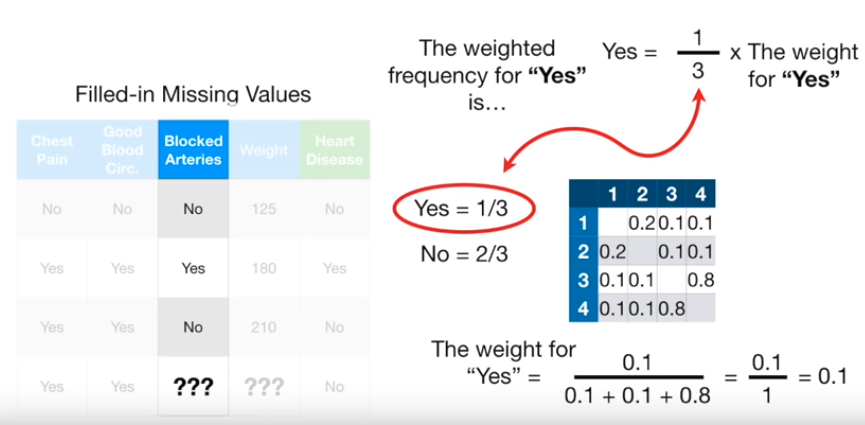

(2) Missing data in new sample that you want to categorize
   - Already have RF built and want to classify new data  
   - Create n number of samples, where n is number of class
   - Use iterative method above to predict missing data in variables (e.g. Blocked arteries)
   - Sample which is correctly labeled by RF the most times is the winner 
   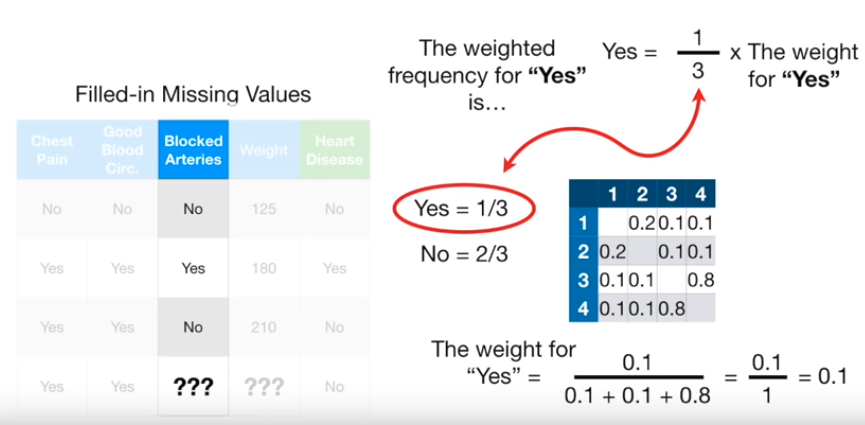
      

In [ ]:
Pure Decision Tree not flexible when it comes to classifying new samples


### Boosting algorithms

Used for reducing bias and variance in supervised learning by combining multiple weak predictors to build a strong predictor.

### AdaBoost

_Uses weight scale to distinguish classified and misclassified data points. High weight = misclassfied_

Step 1: Train a decision tree with each observation has equal weights

Step 2: Evaluate the first tree, increase the weights of those that were misclassified, decrease those that were correct

Step 3: Second tree is trained(grown) on newly weighted data

Step 4: Compute classification error from 2-tree ensemble model (Tree1 + Tree2) and grow third tree to predict.

Step 5: Iterate

_Subsequent trees help to classify observations that are not well classified by previous trees_

**Final model: weighted sum of predictions made by previous tree models**

### Gradient Boosting

_Uses loss function to measure the degree of misclassification/classification_

Step 1 : Assume mean is the prediction of all variables.

Step 2 : Calculate errors of each observation from the mean (latest prediction).

Step 3 : Find the variable that can split the errors perfectly and find the value for the split. This is assumed to be the latest prediction.

Step 4 : Calculate errors of each observation from the mean of both the sides of split (latest prediction).

Step 5 : Repeat the step 3 and 4 till the objective function maximizes/minimizes.

Step 6 : Take a weighted mean of all the classifiers to come up with the final model.

Regression: loss function would be based off the error between true & predicted value
Classification: loss function would be a measure of how good the model is at classifying

#### Gradient Tree Boosting

Pros:
- Handles data of mixed type (e.g. continuous, discrete, category)
- Robust to  outliers via robust loss functions

Cons:
- Scalability due to sequential nature of boosting that can't be parallelized

`GradientBoostingClassifier`: uses decision stumps (decision trees)
`GradientBoostingRegressor`: supports a number of loss functions (default: least squares)

In [12]:
# Fit Regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)

clf.fit(x_train, y_train)
mse = mean_squared_error(y_test, clf.predict(x_test))
print("MSE: %.4f" % mse)

NameError: name 'mean_squared_error' is not defined

In [ ]:
# In case we need feel that the model is underfitting and wants to add more estimators
_ = clf.set_params(n_estimators=200, warm_start=True)
_.fit(x_train, y_train)
mse = mean_squared_error(y_test, clf.predict(x_test))
print("MSE: %.4f" % mse)

In [ ]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
# Out-of-bag estimates

### Pros:
- Allows one to optimize a user-specified cost function